**Project 3: Wine Prediction Redux**
---

Using the provided characteristics, use clustering algorithms to pre-process the data to garner a better prediction using the selected model.

**Imports & Declaring Constants**

In [1]:
### Tool imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from pandas.plotting import scatter_matrix

### sklearn imports
from sklearn.cluster import KMeans, MiniBatchKMeans

### Local imports
import utils.data_handling_lib as dhl
import utils.graphics_lib as gl
import utils.clustering_tools_lib as ctl

from utils.data_handling_lib import RANDOM_STATE

**Load an Explore Copy**

In [2]:
explore_raw_whole = dhl.load_data()

explore_raw = explore_raw_whole[3000:]

explore_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
3000,6.3,0.67,0.48,12.6,0.052,57.0,222.0,0.9979,3.17,0.52,9.3,6,0
3001,7.4,0.40,0.29,5.4,0.044,31.0,122.0,0.9940,3.30,0.50,11.1,8,0
3002,7.1,0.26,0.31,2.2,0.044,29.0,128.0,0.9937,3.34,0.64,10.9,8,0
3003,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.9938,2.90,0.38,11.6,5,0
3004,6.3,0.39,0.24,6.9,0.069,9.0,117.0,0.9942,3.15,0.35,10.2,4,0


In [3]:
explore_raw_whole.count()

fixed acidity           6497
volatile acidity        6497
citric acid             6497
residual sugar          6497
chlorides               6497
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality                 6497
color                   6497
dtype: int64

**Split dataset**

In [4]:
X_train_raw, y_train_raw, X_test_raw, y_test_raw = dhl.strat_split_dataset(X=explore_raw_whole, label_id="quality")

**Scatter plots**

*Running this scatter matrix borks the rest of the graphs, refer to the exported image and heatmap*

In [5]:
#attributes = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
#              "free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol",
#              "quality","color"]
#scatter_matrix(explore_raw[attributes], figsize=(12, 8))

**Correlation matrix**

In [6]:
corr_matrix = explore_raw.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.448825
sulphates               0.043426
pH                      0.041774
free sulfur dioxide     0.008862
citric acid            -0.012855
residual sugar         -0.066449
fixed acidity          -0.131830
volatile acidity       -0.175486
total sulfur dioxide   -0.194259
chlorides              -0.213893
density                -0.306309
color                        NaN
Name: quality, dtype: float64

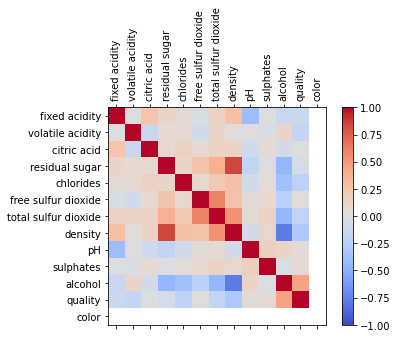

In [7]:
gl.plot_corr_matrix_heatmap(corr_matrix=corr_matrix, dataset=explore_raw_whole)

First look:
    Most significant correlations for *quality* are *alcohol, density, chlorides, volatile acidity*

**KMeans test**

In [8]:
param_grid = dict(kmeans__n_clusters=[_ for _ in range(2,15)])

kmeans = KMeans(n_clusters=8, random_state=RANDOM_STATE)

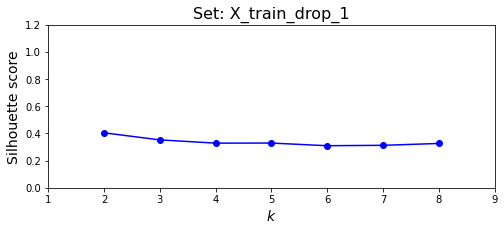

In [9]:
drop_features_1 = ["free sulfur dioxide", "total sulfur dioxide", "pH", "citric acid", "residual sugar", "sulphates", "volatile acidity"]
X_train_drop1, X_test_drop1 = X_train_raw.drop(drop_features_1, axis=1), X_test_raw.drop(drop_features_1, axis=1)

drop_1_sil_scores = ctl.get_silhouette_scores(X_train_drop1, range_upper=10)

gl.plot_silhouette_scores(silhouette_scores=drop_1_sil_scores, var_name="X_train_drop_1")

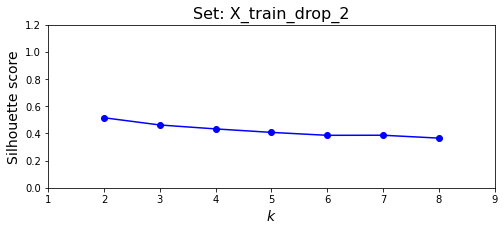

In [10]:
drop_features_2 = ["fixed acidity", "volatile acidity", "density", "residual sugar", "chlorides", "citric acid", "color"]
X_train_drop2, X_test_drop2 = X_train_raw.drop(drop_features_2, axis=1), X_test_raw.drop(drop_features_2, axis=1)

drop_2_sil_scores = ctl.get_silhouette_scores(X_train_drop2, range_upper=10)

gl.plot_silhouette_scores(silhouette_scores=drop_2_sil_scores, var_name="X_train_drop_2")

Second highest performing set.

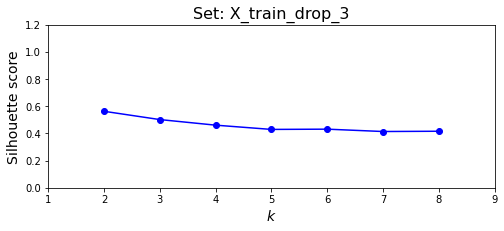

In [11]:
drop_features_3 = ["fixed acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","color"]
X_train_drop3, X_test_drop3 = X_train_raw.drop(drop_features_3, axis=1), X_test_raw.drop(drop_features_3, axis=1)

drop_3_sil_scores = ctl.get_silhouette_scores(X_train_drop3, range_upper=10)

gl.plot_silhouette_scores(silhouette_scores=drop_3_sil_scores, var_name="X_train_drop_3")

Ideal number of clusters is 2, seems to be highest performing set.

*change view: including attribs rather than dropping*